## Dataset1- Gradient Boosting - Catherine Shi
aims to train a model for predicting mobile phone prices based on various attributes, specifications, and features. The goal is to assist phone manufacturers in market research and provide a price indicator for different phones' cost performance.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

# Data Preprocessin
# Splitting the dataset into features and target variable
X = df.drop('price_range', axis=1)
y = df['price_range']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb_cv_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5)
print("Gradient Boosting CV Scores:", gb_cv_scores)

Gradient Boosting CV Scores: [0.884375 0.9125   0.890625 0.8875   0.890625]


In [4]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.9075
[[101   4   0   0]
 [  4  81   6   0]
 [  0   5  80   7]
 [  0   0  11 101]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.90      0.89      0.90        91
           2       0.82      0.87      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## hyperparameter tuning for a Gradient Boosting model 

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Splitting the dataset into features (X) and the target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

# Create a Gradient Boosting Classifier instance
gb = GradientBoostingClassifier()

# Setting up GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', verbose=0)

# Fitting the model with GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

# Evaluating the model with the best hyperparameters
y_pred_gb = best_model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Output the best parameters and the corresponding accuracy
print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Accuracy with Hyperparameter Tuning for Gradient Boosting:", accuracy_gb)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 300}
Accuracy with Hyperparameter Tuning for Gradient Boosting: 0.915


In [8]:
# Cross-validation
cv_results_gb = cross_validate(best_model_gb, X, y, cv=8, scoring=['accuracy', 'neg_mean_squared_error'])

# Printing the results
print('Accuracy for each fold (Gradient Boosting):')
print(cv_results_gb['test_accuracy'])

print('Mean Squared Error for each fold (Gradient Boosting):')
print(-1 * cv_results_gb['test_neg_mean_squared_error'])

print('Average Accuracy (Gradient Boosting) =', cv_results_gb['test_accuracy'].mean())
print('Average MSE (Gradient Boosting) =', (-1 * cv_results_gb['test_neg_mean_squared_error']).mean())


Accuracy for each fold (Gradient Boosting):
[0.916 0.928 0.916 0.908 0.912 0.912 0.872 0.904]
Mean Squared Error for each fold (Gradient Boosting):
[0.084 0.072 0.084 0.092 0.088 0.088 0.128 0.096]
Average Accuracy (Gradient Boosting) = 0.9085000000000001
Average MSE (Gradient Boosting) = 0.0915


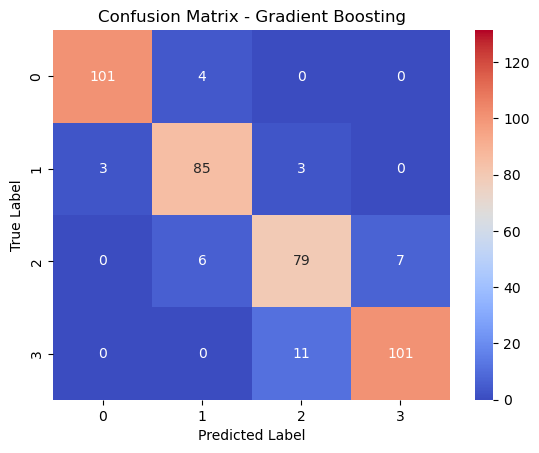

In [10]:
# Gradient Boosting Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Find the maximum value in the confusion matrix for scaling
max_val = cm_gb.max()

# Visualizing the Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="coolwarm", vmin=0, vmax=max_val * 1.3)  
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
